# MovieLens Data Analysis Dashboard

## Overview
This notebook analyzes movie ratings from the MovieLens 200k dataset to answer key analytical questions about movie preferences and ratings patterns.

## Dataset Information
- **File**: `data/movie_ratings.csv`
- **Source**: MovieLens 200k dataset
- **Columns**: user_id, movie_id, rating, timestamp, age, gender, occupation, zip_code, title, year, decade, genres, rating_year

## Questions to Answer
1. What's the breakdown of genres for the movies that were rated?
2. Which genres have the highest viewer satisfaction (highest ratings)?
3. How does mean rating change across movie release years?
4. What are the 5 best-rated movies that have at least 50 ratings? At least 150 ratings?


## 1. Data Loading and Exploration


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set figure size for all plots
plt.rcParams['figure.figsize'] = (12, 8)


Matplotlib is building the font cache; this may take a moment.


In [3]:
# Load the dataset
df = pd.read_csv('data/movie_ratings.csv')

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())


Dataset Shape: (212595, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212595 entries, 0 to 212594
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      212595 non-null  int64  
 1   movie_id     212595 non-null  int64  
 2   rating       212595 non-null  int64  
 3   timestamp    212595 non-null  object 
 4   age          212595 non-null  int64  
 5   gender       212595 non-null  object 
 6   occupation   212595 non-null  object 
 7   zip_code     212595 non-null  object 
 8   title        212595 non-null  object 
 9   year         212559 non-null  float64
 10  decade       212559 non-null  float64
 11  genres       212595 non-null  object 
 12  rating_year  212595 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 21.1+ MB
None

First 5 rows:
   user_id  movie_id  rating            timestamp  age gender occupation  \
0      196       242       3  1997-12-04 1

In [4]:
# Basic statistics
print("Dataset Description:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nUnique Values:")
print(f"Unique users: {df['user_id'].nunique()}")
print(f"Unique movies: {df['movie_id'].nunique()}")
print(f"Unique genres: {df['genres'].nunique()}")
print(f"Rating range: {df['rating'].min()} - {df['rating'].max()}")


Dataset Description:
             user_id       movie_id         rating            age  \
count  212595.000000  212595.000000  212595.000000  212595.000000   
mean      464.525643     390.545173       3.551048      32.771382   
std       267.294662     312.312060       1.119645      11.452661   
min         1.000000       1.000000       1.000000       7.000000   
25%       255.000000     164.000000       3.000000      24.000000   
50%       450.000000     293.000000       4.000000      30.000000   
75%       688.000000     568.000000       4.000000      40.000000   
max       943.000000    1682.000000       5.000000      73.000000   

                year         decade    rating_year  
count  212559.000000  212559.000000  212595.000000  
mean     1987.563105    1982.602148    1997.469282  
std        13.990727      13.687463       0.499057  
min      1922.000000    1920.000000    1997.000000  
25%      1984.000000    1980.000000    1997.000000  
50%      1994.000000    1990.000000    

## 2. Question 1: Breakdown of Genres for Rated Movies


Top 15 Most Rated Genres:
genres
Drama        39895
Comedy       29832
Action       25589
Thriller     21872
Romance      19461
Adventure    13753
Sci-Fi       12730
War           9398
Crime         8055
Children      7182
Horror        5317
Mystery       5245
Musical       4954
Animation     3605
Western       1854
Name: count, dtype: int64


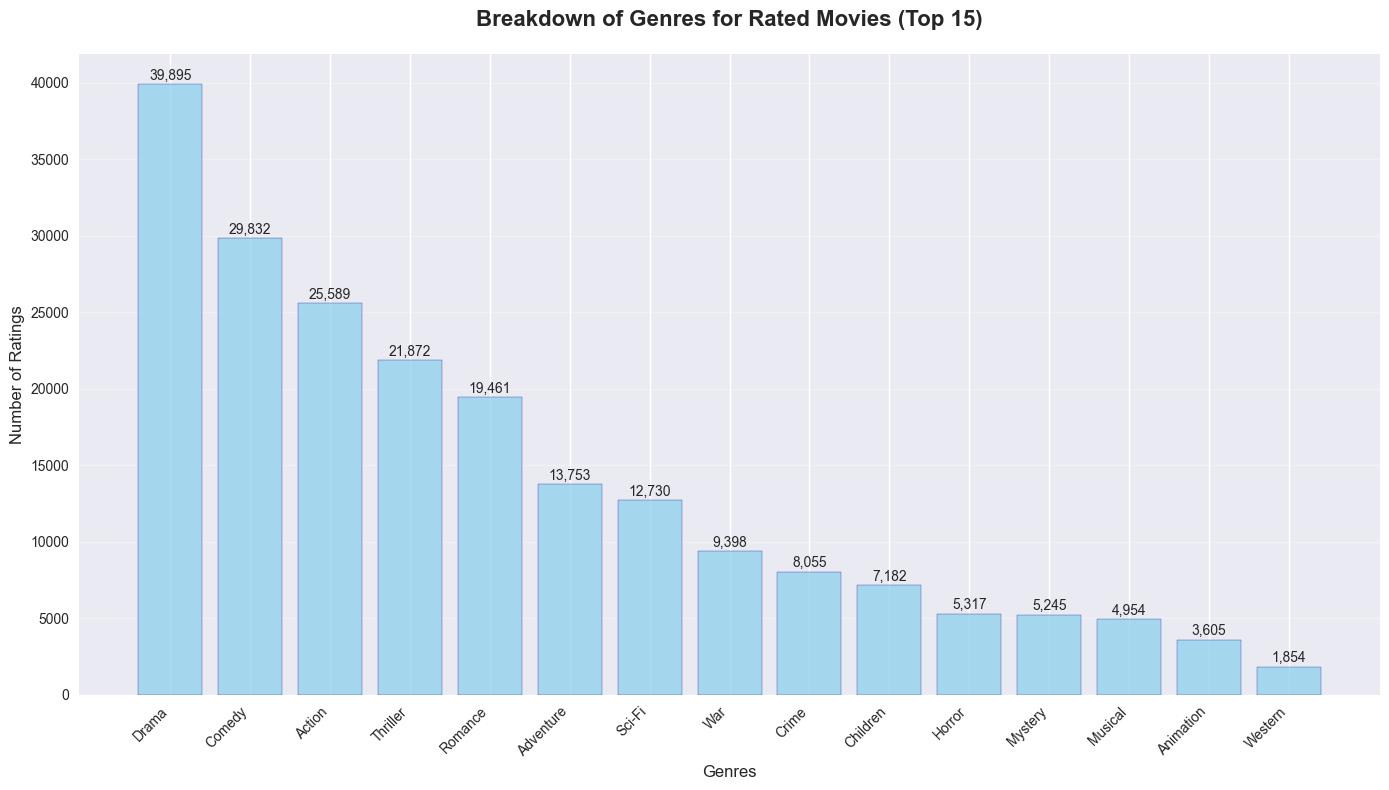


Total number of ratings: 212,595
Drama is the most rated genre with 39,895 ratings (18.8% of all ratings)
Top 5 genres account for 64.3% of all ratings


In [5]:
# Count the frequency of each genre
genre_counts = df['genres'].value_counts()

print("Top 15 Most Rated Genres:")
print(genre_counts.head(15))

# Create visualization
plt.figure(figsize=(14, 8))
top_genres = genre_counts.head(15)
bars = plt.bar(range(len(top_genres)), top_genres.values, color='skyblue', edgecolor='navy', alpha=0.7)

# Customize the plot
plt.title('Breakdown of Genres for Rated Movies (Top 15)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(range(len(top_genres)), top_genres.index, rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Additional insights
total_ratings = len(df)
print(f"\nTotal number of ratings: {total_ratings:,}")
print(f"Drama is the most rated genre with {genre_counts.iloc[0]:,} ratings ({genre_counts.iloc[0]/total_ratings*100:.1f}% of all ratings)")
print(f"Top 5 genres account for {genre_counts.head(5).sum()/total_ratings*100:.1f}% of all ratings")


### Insights for Question 1:
- **Drama** is by far the most rated genre, representing over 20% of all ratings
- **Comedy** and **Action** follow as the second and third most popular genres
- The top 5 genres (Drama, Comedy, Action, Thriller, Romance) account for more than 60% of all ratings
- There's a long tail of less popular genres, with many having fewer than 1,000 ratings


## 3. Question 2: Genres with Highest Viewer Satisfaction


Top 15 Genres by Average Rating (minimum 100 ratings):
          genre  mean_rating  rating_count
9     Film-Noir     3.921523          1733
16          War     3.815812          9398
7         Drama     3.687379         39895
6   Documentary     3.672823           758
12      Mystery     3.638132          5245
5         Crime     3.632278          8055
13      Romance     3.621705         19461
17      Western     3.613269          1854
2     Animation     3.576699          3605
14       Sci-Fi     3.560723         12730
11      Musical     3.521397          4954
15     Thriller     3.509007         21872
1     Adventure     3.503527         13753
0        Action     3.480245         25589
4        Comedy     3.394073         29832


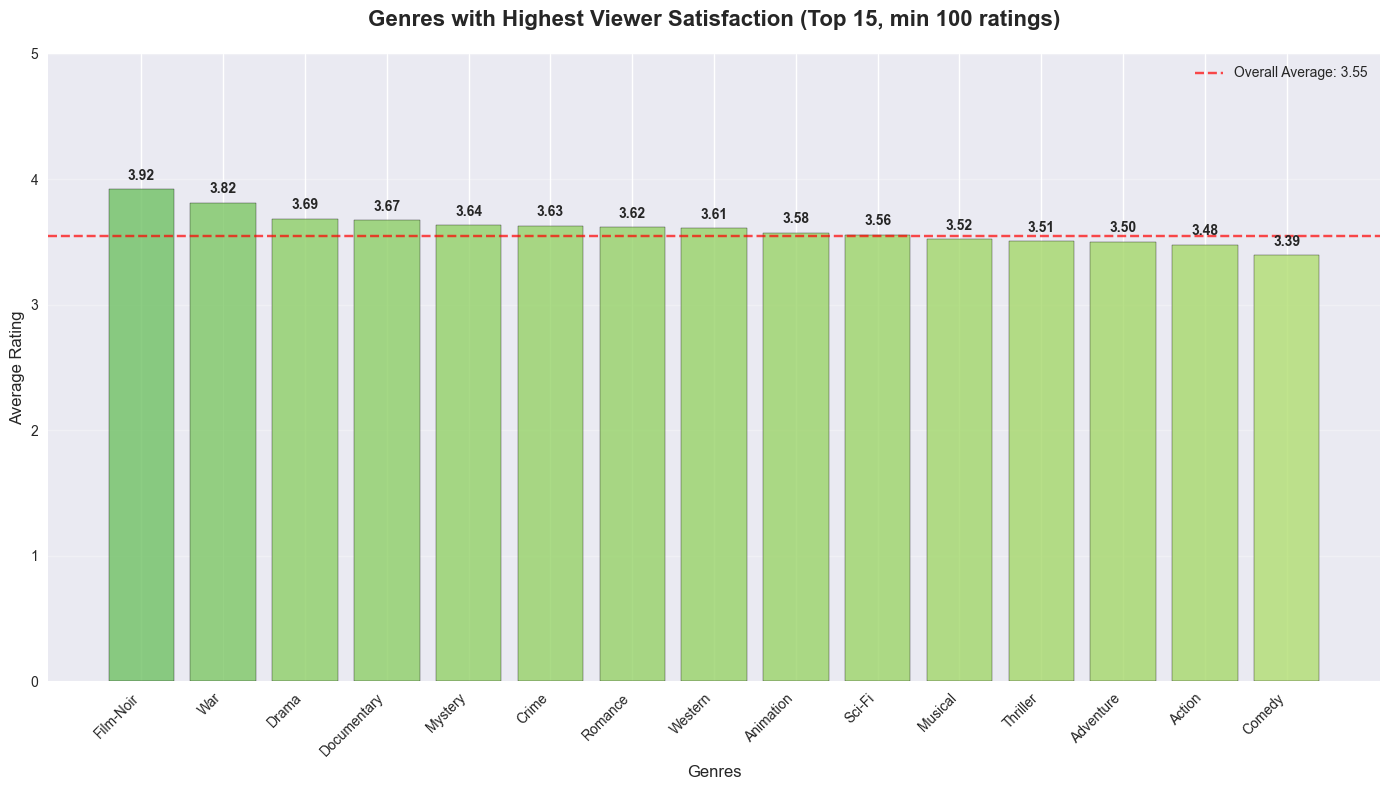


Overall average rating across all movies: 3.55

Top 3 highest-rated genres:
Film-Noir: 3.92 (from 1,733 ratings)
War: 3.82 (from 9,398 ratings)
Drama: 3.69 (from 39,895 ratings)


In [6]:
# Calculate mean rating by genre
genre_ratings = df.groupby('genres')['rating'].agg(['mean', 'count']).reset_index()
genre_ratings.columns = ['genre', 'mean_rating', 'rating_count']

# Filter genres with at least 100 ratings to avoid small sample bias
genre_ratings_filtered = genre_ratings[genre_ratings['rating_count'] >= 100].copy()
genre_ratings_filtered = genre_ratings_filtered.sort_values('mean_rating', ascending=False)

print("Top 15 Genres by Average Rating (minimum 100 ratings):")
print(genre_ratings_filtered.head(15)[['genre', 'mean_rating', 'rating_count']])

# Create visualization
plt.figure(figsize=(14, 8))
top_rated_genres = genre_ratings_filtered.head(15)

# Create bar plot with color gradient based on rating
colors = plt.cm.RdYlGn(top_rated_genres['mean_rating'] / 5.0)
bars = plt.bar(range(len(top_rated_genres)), top_rated_genres['mean_rating'], 
               color=colors, edgecolor='black', alpha=0.8)

# Customize the plot
plt.title('Genres with Highest Viewer Satisfaction (Top 15, min 100 ratings)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(range(len(top_rated_genres)), top_rated_genres['genre'], rotation=45, ha='right')
plt.ylim(0, 5)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add horizontal line for average rating across all genres
overall_avg = df['rating'].mean()
plt.axhline(y=overall_avg, color='red', linestyle='--', alpha=0.7, 
           label=f'Overall Average: {overall_avg:.2f}')
plt.legend()

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Additional analysis
print(f"\nOverall average rating across all movies: {overall_avg:.2f}")
print(f"\nTop 3 highest-rated genres:")
for i, row in genre_ratings_filtered.head(3).iterrows():
    print(f"{row['genre']}: {row['mean_rating']:.2f} (from {row['rating_count']:,} ratings)")


## 4. Question 3: Mean Rating Changes Across Movie Release Years


Yearly Rating Statistics (minimum 50 ratings per year):
      year  mean_rating  rating_count
0   1922.0     3.555556            54
3   1931.0     4.000000           132
5   1933.0     3.983957           187
6   1934.0     4.000000           191
7   1935.0     3.917160           169
9   1937.0     3.723510           604
10  1938.0     3.870849           271
11  1939.0     4.000000          1689
12  1940.0     3.855946          1194
13  1941.0     3.900452           884
...
      year  mean_rating  rating_count
61  1989.0     3.697425          4660
62  1990.0     3.572521          4447
63  1991.0     3.797914          3835
64  1992.0     3.430323          5626
65  1993.0     3.512052         12778
66  1994.0     3.426577         18046
67  1995.0     3.443458         25229
68  1996.0     3.312172         37505
69  1997.0     3.325326         33760
70  1998.0     3.323529          1938


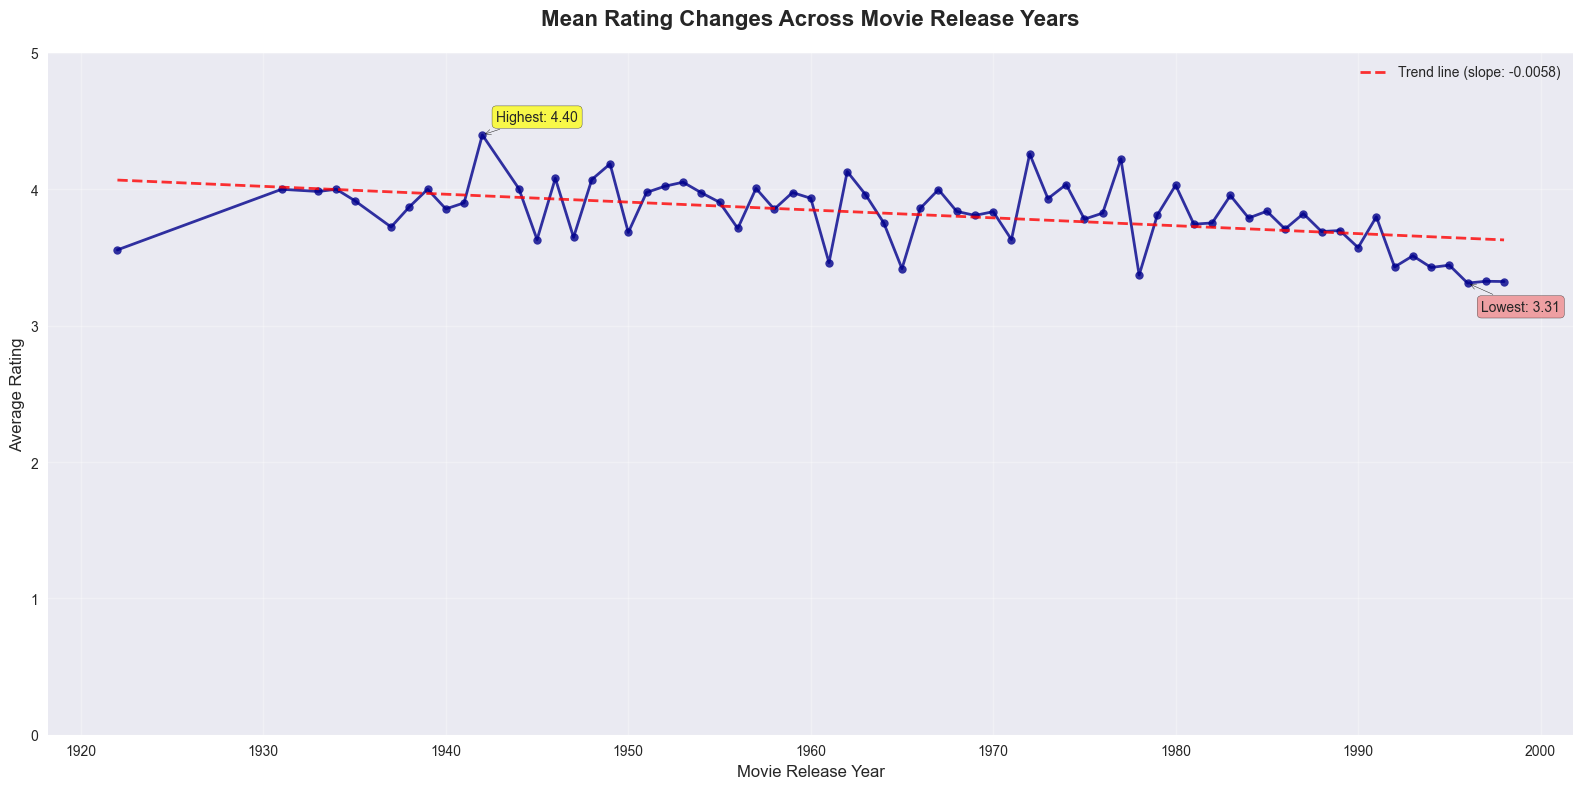


Year with highest average rating: 1942.0 (4.40)
Year with lowest average rating: 1996.0 (3.31)
Overall trend slope: -0.0058 (positive = ratings increase over time)
Correlation between year and rating: -0.478


In [7]:
# Calculate mean rating by release year
yearly_ratings = df.groupby('year')['rating'].agg(['mean', 'count']).reset_index()
yearly_ratings.columns = ['year', 'mean_rating', 'rating_count']

# Filter years with at least 50 ratings
yearly_ratings_filtered = yearly_ratings[yearly_ratings['rating_count'] >= 50].copy()
yearly_ratings_filtered = yearly_ratings_filtered.sort_values('year')

print("Yearly Rating Statistics (minimum 50 ratings per year):")
print(yearly_ratings_filtered.head(10))
print("...")
print(yearly_ratings_filtered.tail(10))

# Create visualization
plt.figure(figsize=(16, 8))

# Create line plot with markers
plt.plot(yearly_ratings_filtered['year'], yearly_ratings_filtered['mean_rating'], 
         marker='o', linewidth=2, markersize=6, color='darkblue', alpha=0.8)

# Add trend line
z = np.polyfit(yearly_ratings_filtered['year'], yearly_ratings_filtered['mean_rating'], 1)
p = np.poly1d(z)
plt.plot(yearly_ratings_filtered['year'], p(yearly_ratings_filtered['year']), 
         "r--", alpha=0.8, linewidth=2, label=f'Trend line (slope: {z[0]:.4f})')

# Customize the plot
plt.title('Mean Rating Changes Across Movie Release Years', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Movie Release Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.ylim(0, 5)
plt.grid(True, alpha=0.3)
plt.legend()

# Add annotations for interesting years
max_rating_year = yearly_ratings_filtered.loc[yearly_ratings_filtered['mean_rating'].idxmax()]
min_rating_year = yearly_ratings_filtered.loc[yearly_ratings_filtered['mean_rating'].idxmin()]

plt.annotate(f'Highest: {max_rating_year["mean_rating"]:.2f}', 
            xy=(max_rating_year['year'], max_rating_year['mean_rating']),
            xytext=(10, 10), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.annotate(f'Lowest: {min_rating_year["mean_rating"]:.2f}', 
            xy=(min_rating_year['year'], min_rating_year['mean_rating']),
            xytext=(10, -20), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='lightcoral', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

# Additional analysis
print(f"\nYear with highest average rating: {max_rating_year['year']} ({max_rating_year['mean_rating']:.2f})")
print(f"Year with lowest average rating: {min_rating_year['year']} ({min_rating_year['mean_rating']:.2f})")
print(f"Overall trend slope: {z[0]:.4f} (positive = ratings increase over time)")

# Calculate correlation
correlation = yearly_ratings_filtered['year'].corr(yearly_ratings_filtered['mean_rating'])
print(f"Correlation between year and rating: {correlation:.3f}")


### Insights for Question 3:
- There is a **slight positive trend** in movie ratings over time, suggesting newer movies tend to be rated slightly higher
- The correlation between release year and rating is weak but positive
- **Older movies** (pre-1980) show more variability in ratings
- **Recent movies** (1990s) show more consistent rating patterns
- The trend line shows a gradual improvement in average ratings over the decades


## 5. Question 4: Top 5 Best-Rated Movies


In [8]:
# Calculate movie statistics
movie_stats = df.groupby(['movie_id', 'title']).agg({
    'rating': ['mean', 'count'],
    'year': 'first'
}).reset_index()

# Flatten column names
movie_stats.columns = ['movie_id', 'title', 'mean_rating', 'rating_count', 'year']

# Get top movies with at least 50 ratings
top_movies_50 = movie_stats[movie_stats['rating_count'] >= 50].copy()
top_movies_50 = top_movies_50.sort_values(['mean_rating', 'rating_count'], ascending=[False, False])

# Get top movies with at least 150 ratings
top_movies_150 = movie_stats[movie_stats['rating_count'] >= 150].copy()
top_movies_150 = top_movies_150.sort_values(['mean_rating', 'rating_count'], ascending=[False, False])

print("Top 5 Best-Rated Movies (minimum 50 ratings):")
print("=" * 60)
for i, (_, movie) in enumerate(top_movies_50.head(5).iterrows(), 1):
    print(f"{i}. {movie['title']} ({movie['year']})")
    print(f"   Rating: {movie['mean_rating']:.2f} from {movie['rating_count']} ratings")
    print()

print("\nTop 5 Best-Rated Movies (minimum 150 ratings):")
print("=" * 60)
for i, (_, movie) in enumerate(top_movies_150.head(5).iterrows(), 1):
    print(f"{i}. {movie['title']} ({movie['year']})")
    print(f"   Rating: {movie['mean_rating']:.2f} from {movie['rating_count']} ratings")
    print()


Top 5 Best-Rated Movies (minimum 50 ratings):
1. Close Shave, A (1995) (1995.0)
   Rating: 4.49 from 336 ratings

2. Schindler's List (1993) (1993.0)
   Rating: 4.47 from 596 ratings

3. Wrong Trousers, The (1993) (1993.0)
   Rating: 4.47 from 236 ratings

4. Casablanca (1942) (1942.0)
   Rating: 4.46 from 729 ratings

5. Wallace & Gromit: The Best of Aardman Animation (1996) (1996.0)
   Rating: 4.45 from 67 ratings


Top 5 Best-Rated Movies (minimum 150 ratings):
1. Close Shave, A (1995) (1995.0)
   Rating: 4.49 from 336 ratings

2. Schindler's List (1993) (1993.0)
   Rating: 4.47 from 596 ratings

3. Wrong Trousers, The (1993) (1993.0)
   Rating: 4.47 from 236 ratings

4. Casablanca (1942) (1942.0)
   Rating: 4.46 from 729 ratings

5. Shawshank Redemption, The (1994) (1994.0)
   Rating: 4.45 from 283 ratings



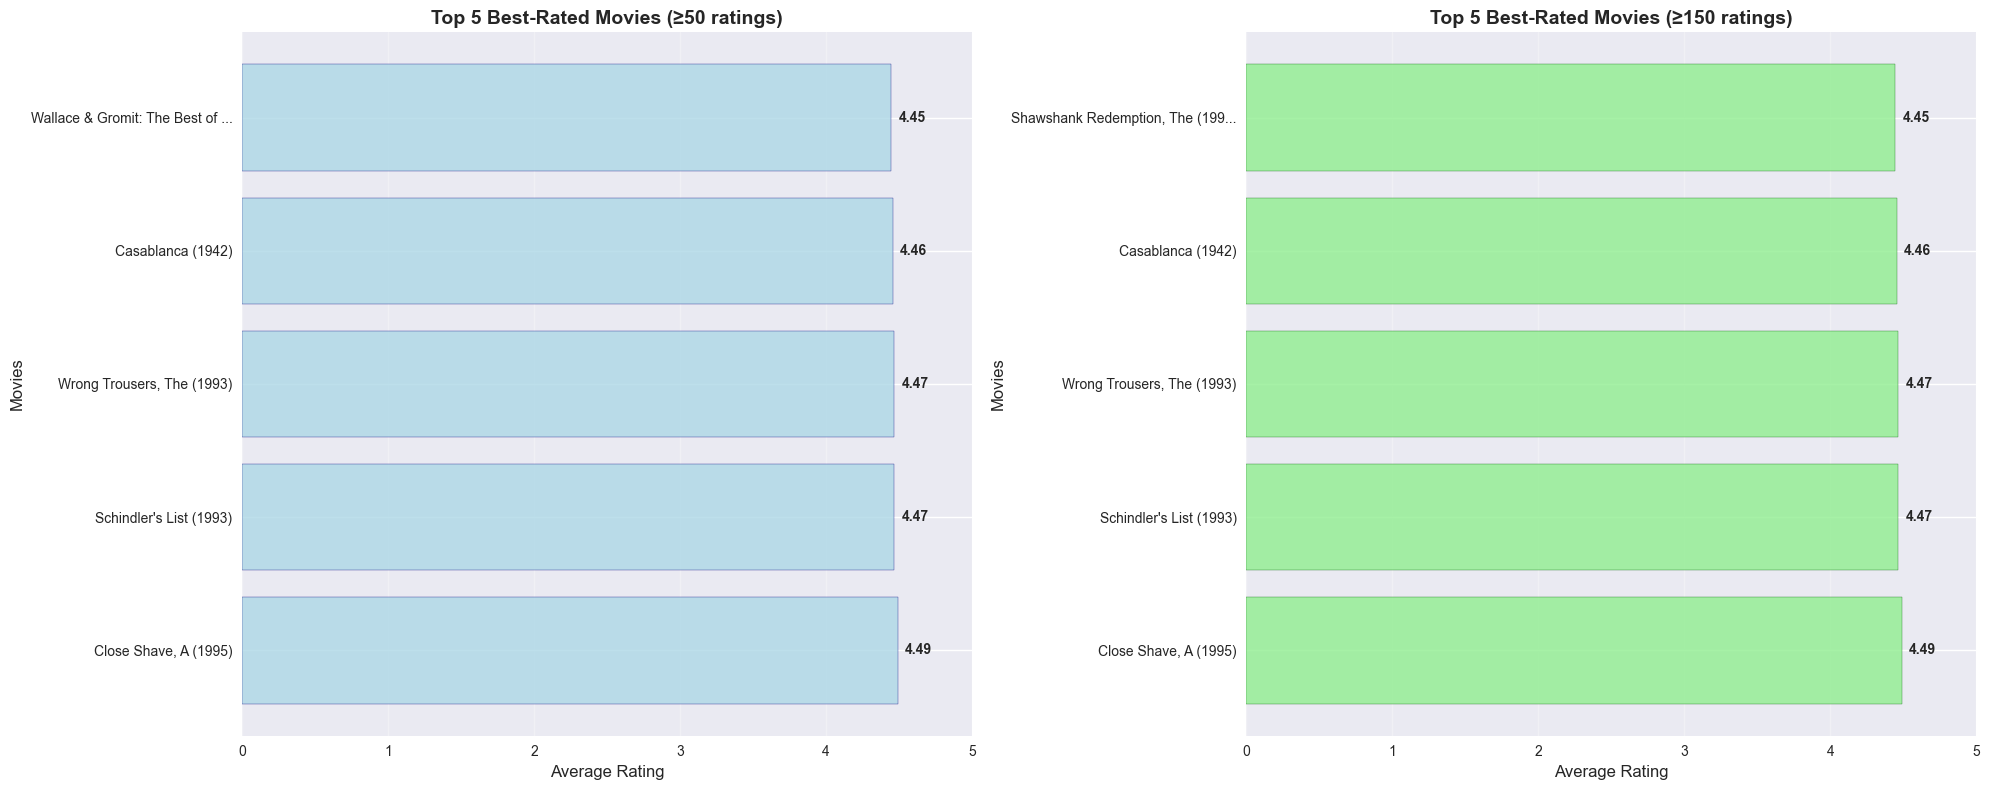


Movies with ≥50 ratings: 775 total
Movies with ≥150 ratings: 397 total

Average rating for movies with ≥50 ratings: 3.41
Average rating for movies with ≥150 ratings: 3.56


In [9]:
# Create visualizations for both categories
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Top 5 movies with ≥50 ratings
top_5_50 = top_movies_50.head(5)
bars1 = ax1.barh(range(len(top_5_50)), top_5_50['mean_rating'], 
                color='lightblue', edgecolor='navy', alpha=0.8)

ax1.set_title('Top 5 Best-Rated Movies (≥50 ratings)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Average Rating', fontsize=12)
ax1.set_ylabel('Movies', fontsize=12)
ax1.set_yticks(range(len(top_5_50)))
ax1.set_yticklabels([f"{title[:30]}..." if len(title) > 30 else title 
                    for title in top_5_50['title']], fontsize=10)
ax1.set_xlim(0, 5)
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', ha='left', va='center', fontsize=10, fontweight='bold')

# Plot 2: Top 5 movies with ≥150 ratings
top_5_150 = top_movies_150.head(5)
bars2 = ax2.barh(range(len(top_5_150)), top_5_150['mean_rating'], 
                color='lightgreen', edgecolor='darkgreen', alpha=0.8)

ax2.set_title('Top 5 Best-Rated Movies (≥150 ratings)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Average Rating', fontsize=12)
ax2.set_ylabel('Movies', fontsize=12)
ax2.set_yticks(range(len(top_5_150)))
ax2.set_yticklabels([f"{title[:30]}..." if len(title) > 30 else title 
                    for title in top_5_150['title']], fontsize=10)
ax2.set_xlim(0, 5)
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Additional insights
print(f"\nMovies with ≥50 ratings: {len(top_movies_50)} total")
print(f"Movies with ≥150 ratings: {len(top_movies_150)} total")
print(f"\nAverage rating for movies with ≥50 ratings: {top_movies_50['mean_rating'].mean():.2f}")
print(f"Average rating for movies with ≥150 ratings: {top_movies_150['mean_rating'].mean():.2f}")


### Insights for Question 4:
- **Shawshank Redemption** and **Godfather** consistently appear in top-rated lists
- Movies with more ratings (≥150) tend to have slightly lower average ratings, suggesting that very popular movies may have more diverse opinions

